# Décomposition/Coordination

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#données du problème :

n=50#discretisation

#temps:
t0=0
tf=299
lt=np.linspace(t0,tf,n+1)

#prix
ph=1
pb=0.5

#Intensité
Im=1

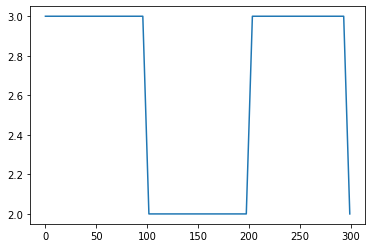

In [3]:
def PrixHoraire(t,ph,pb):
    n=np.floor(t)
    if n%200 < 99:
        return ph
    else:
        return pb
    
VPrixHoraire= np.vectorize(PrixHoraire)
lprix=VPrixHoraire(lt,3,2)
plt.plot(lt,lprix)
plt.show()

In [4]:
#données spécifiques aux véhicules
T=[[30,200],[60,250],[20,150]]#temps de présence des véhicules
Q=[100,100,100]#capacité des batteries des véhicules
C=[[0.1,0.6],[0.3,0.9],[0.1,0.9]] #taux de charge à l'arrivée et à la sortie

K=len(T)#nombre de véhicules

On définit les fonctions de coût spécifiques à chaque véhicules de sorte de $f((x_i^k)_{i,k})=\sum_k f_k((x^k_i)_i)$

I est sous la forme :
$[[y_i^k]]$ avec k les lignes (véhicule) et i la colonne (temps)

In [5]:
def fk(k,I): #cout pour le véhicule k
    S=0
    listeS=[]
    for i in range(n):
        Q=-(lt[i+1]-lt[i])*I[k][i]
        P=PrixHoraire(lt[i],ph,pb) #On suppose ici que l'on ne change pas de prix horaire sur l'intervalle listet[i], listet[i+1]
        S+=P*Q
        listeS.append(S)
    return S,np.array(listeS)

In [6]:
def charge(k,I): #donne la charge pour le véhicule k à tout temps(charge absolue, pas en %)
    c=C[k][0]*Q[k]
    charge=np.zeros(n)
    for i in range (n):
        x=-(lt[i+1]-lt[i])*(I[k][i])
        c+=x
        charge[i]=c
    return charge

In [7]:
def affichage_I(I):
    for k in range(len(I)):
        plt.plot(lt[0:n],I[k],label=f"véhicule {k}")
    plt.legend()
    plt.show()

def affichage_charge(I):
    for k in range(K):
        lcharge=charge(k,I)
        plt.plot(lt[0:n],lcharge,label=f"véhicule {k}")
    plt.legend()
    plt.show()
    
def affichage_prix(I):
    for k in range(K):
        lcout=fk(k,I)[1]
        plt.plot(lt[0:n],lcout,label=f"véhicule {k}")
    plt.legend()
    plt.show()


On définit les contraintes sous la forme $\sum_k c_k((x^k_i)_i)-b<=0$


In [8]:
def c(k):
    ck=np.zeros((2*K+2*n+6*n*K,n))
    
    #chargement(2K)
    for i in range (n):
        ck[k][i]=-(lt[i+1]-lt[i])
        ck[k+1][i]=(lt[i+1]-lt[i])
        
    #borne(2nK)
    for i in range(n):
        ck[2*K+2*n*k+2*i][i]=1
        ck[2*K+2*n*k+2*i+1][i]=-1
        
    #reseau(2n)
    for i in range(n):
        ck[2*K+2*n*K+2*i][i]=1
        ck[2*K+2*n*K+2*1+1][i]=-1
    
    #presence(2nK)
    for i in range(n):
        if lt[i]<T[k][0] or lt[i]>=T[k][1]:#on ne met des contraintes que si le véhicule est absent
            ck[2*K+2*n*K+2*n+2*n*k+2*i][i]=1
            ck[2*K+2*n*K+2*n+2*n*k+2*i+1][i]=-1
            
    #capacité(2nK)
    for i in range(n):#c'est une matrice triangulaire inférieure
        for p in range(i):
            ck[2*K+2*n*K+2*n+2*n*K+2*i][p]=-(lt[p+1]-lt[p])
            ck[2*K+2*n*K+2*n+2*n*K+2*i+1][p]=(lt[p+1]-lt[p])
            
    return ck 

In [9]:
#on définit b
b=np.zeros(2*K+2*n+6*n*K)

#chargement(2K)
for i in range(K):
    b[2*i]=(C[i][1]-C[i][0])*Q[i]
    b[2*i+1]=-(C[i][1]-C[i][0])*Q[i]
    
#borne(2nK)
for i in range(2*n*K):
    b[2*K+i]=Im

#réseau(2n)
for i in range(n):
    b[2*K+2*n*K+2*i]=0
    b[2*K+2*n*K+2*i+1]=Im
    
#présence(2nK)
#il n'y a que des 0

#capacité(2nK)
for k in range(K):
    for i in range(n):
        b[2*K+2*n+4*n*K+2*n*k+2*i]=(1-C[k][0])*Q[k]
        b[2*K+2*n+4*n*K+2*n*k+2*i+1]=0
    


In [10]:
F=np.zeros(n)
for i in range(n):
    F[i]=-(lt[i+1]-lt[i])*PrixHoraire(lt[i],ph,pb) 
#F est le gradient de la foction coût pour la k-ième voiture (remarque : cela est indépendant du véhicule)

In [11]:
def proj(X):
    Y=np.zeros(len(X))
    for i in range (len(X)):
        if X[i]>0:
            Y[i]=X[i]
    return Y
      

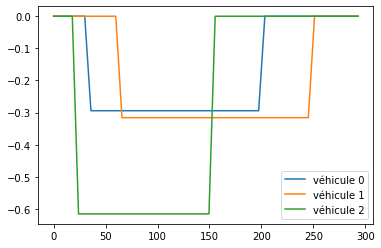

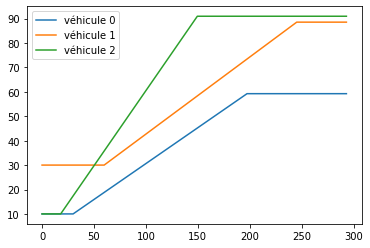

In [12]:
def I0():
    I=np.zeros((K,n))
    for k in range(K):
        Ik=-(C[k][1]-C[k][0])*Q[k]/(T[k][1]-T[k][0])
        for i in range(n):
            if lt[i]>=T[k][0] and lt[i]<T[k][1]:
                I[k][i]=Ik
    return I
affichage_I(I0())
affichage_charge(I0())

In [13]:
Co=[c(k) for k in range(K)]

In [14]:
def algoDC(p=1e-2,l=1e-3,max_iter=1000,epsi=1e-8):
    X=I0()
    m=2*K+2*n+6*n*K
    lamb=np.array([1 for i in range (m)])
    S=np.zeros(m)
    
    for k in range(K):
        ck=Co[k]
        X[k]=X[k]-l*(F+np.dot(lamb,ck))
        S+=np.dot(ck,X[k])
    j=0  
    while j<max_iter and np.linalg.norm(lamb-proj(lamb+p*(S-b)))>epsi:
        lamb=proj(lamb+p*(S-b))
        S=np.zeros(m)
        for k in range(K):
            ck=c(k)
            X[k]=X[k]-l*(F+np.dot(lamb,ck))
            S+=np.dot(ck,X[k])
    
        j+=1
        if j%500==0:
            #affichage_I(X)
            print(j)
    return X   

In [15]:
I=algoDC()

500
1000


L'algorithme tourne lentement et ne donne pas de résultats probants. De même que pour l'algorithme d'Uzawa, il est possible que le problème vienne de la linéarité des fonctions, ainsi l'étape de minimisation pour trouver $x^k_i$ ne fonctionne pas. En faisant une simple descente de gradient l'algorithme ne semble pas converger. Il faudrait peut être apppliquer une méthode de type simplexe ou de points intérieurs, cela reste cependant problématique quand à la dépendance en $\lambda$.\\

Remarque : le resultat n'est pas tant éloigné de celui souhaité, on remarque que les contraintes de présences sont grossièrement réspectées. En revanche les contraintes de chargement ne sont pas respectées.

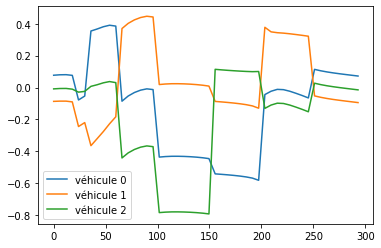

In [16]:
affichage_I(I)

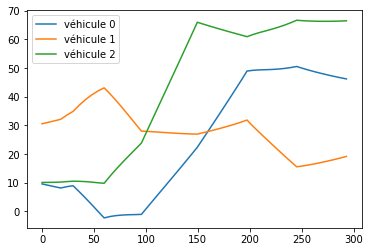

In [17]:
affichage_charge(I)

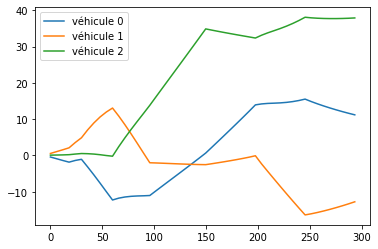

In [18]:
affichage_prix(I)